#  Apps Dataset
Google Play Store dataset을 가져왔습니다.   
Rating 컬럼을 target으로 설정하고 예측하는 앙상블을 진행해봅시다  

## 앙상블 조건
1. 이상치 처리
2. 범주형 변수 처리 : 비슷한 것 끼리 묶기 , 더미변수화 등  
3. 베이스 모델 하이퍼파라미터 튜닝  
4. stacking : 최소 두 가지 방법 시도  
5. stacking with grid search   
6. 앙상블에 대한 설명 주석을 마크다운으로 꼼꼼히!  

|  <center>변수명</center> |  <center>설명</center> |  <center>비고</center> |
|:--------|:--------|:--------|
| App | 어플명 | |  
| Rating | 평점 | target |
| Reviews | 리뷰갯수 | |
| Size | 어플 크기 | |
| Installs | 다운로드 횟수 | |
| Price | 가격 | |
| Content Rating | 관람가 | |
| Genres | 세부장르 | |
| Last Updated | 마지막 업데이트 | |

In [ ]:
cd /content/drive/My Drive/투빅스_정규세션2/강의준비

In [1]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
train = pd.read_csv('ggstore_train.csv')
test = pd.read_csv('ggstore_test.csv')

## 1. EDA & Data Processing


* 데이터 확인 및 결측치 확인

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [33]:
train.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,0,0.0,Everyone,Art & Design,2017-03-26,5
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,0,0.0,Everyone,Art & Design,2018-04-26,6
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,0,0.0,Everyone,Art & Design,2018-06-14,7
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,0,0.0,Everyone,Art & Design,2017-09-20,8
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,0,0.0,Everyone,Art & Design;Creativity,2018-07-03,9


In [34]:
train.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


In [36]:
test.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

#### 연속형 변수

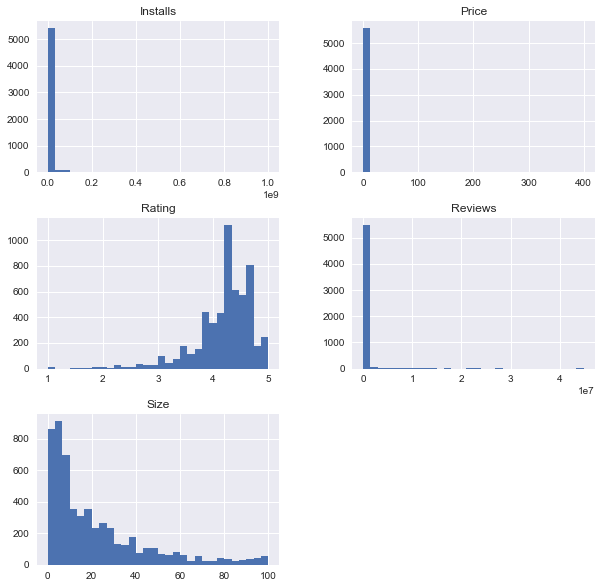

In [3]:
# 연속형 변수 분포 확인
continuous = train[['Rating','Reviews','Size','Installs','Price']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

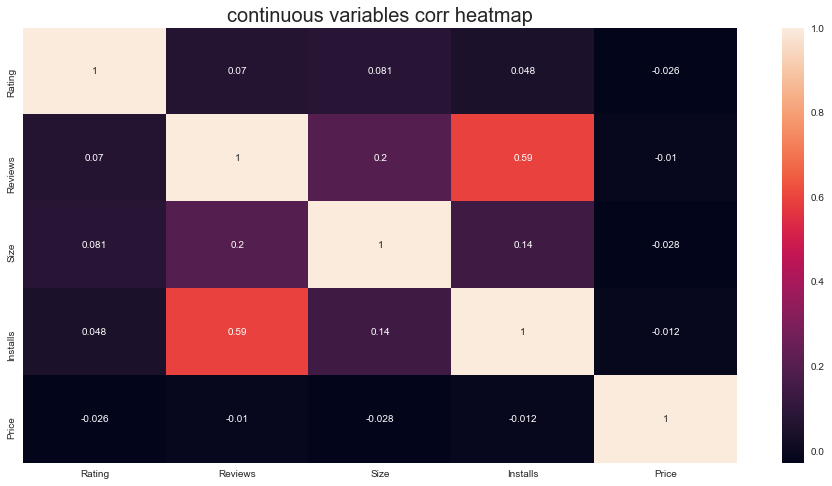

In [4]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

### 연속형 변수 이상치 확인
Type 은 유무료를 나타내는 범주형

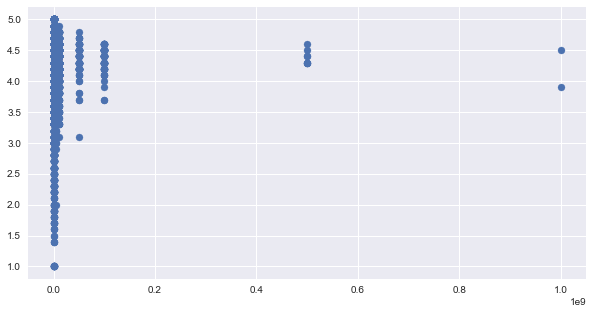

In [39]:
# Installs
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Installs'], y = continuous['Rating'])

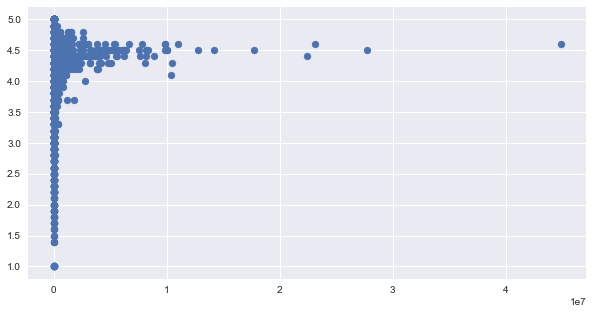

In [40]:
# Reviews
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Reviews'], y = continuous['Rating'])

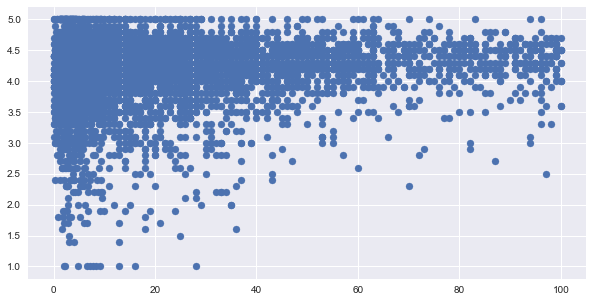

In [41]:
# Size
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Size'], y = continuous['Rating'])

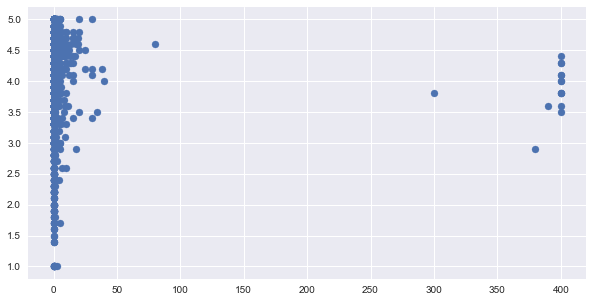

In [42]:
# Price
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Price'], y = continuous['Rating'])

* 직관적으로

In [5]:
out_installs = continuous[continuous['Installs'] > 200000000]
out_price = continuous[continuous['Price'] > 250]
out_reviews = continuous[continuous['Reviews'] > 15000000]
print(len(out_installs))
print(len(out_price))
print(len(out_reviews))

10
15
5


In [6]:
continuous = continuous.query('Installs < 200000000 and Price < 250 and Reviews < 40000000')
continuous.shape

(5590, 5)

In [7]:
continuous

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000.0,0.00
1,3.9,967,14.0,500000.0,0.00
2,4.7,87510,8.7,5000000.0,0.00
3,4.5,215644,25.0,50000000.0,0.00
4,4.3,967,2.8,100000.0,0.00
...,...,...,...,...,...
5611,4.1,97209,6.7,1000000.0,0.00
5612,4.0,4518,41.0,1000000.0,0.00
5613,4.3,146,6.0,10000.0,0.00
5614,4.5,3580,60.0,100000.0,0.00


### 범주형 변수 확인  
Category, Content Rating, Genres 확인

In [46]:
category_count = train['Category'].value_counts()
category_count

FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
LIBRARIES_AND_DEMO       57
ART_AND_DESIGN           57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
EVENTS                   34
BEAUTY                   34
Name: Category, dtype: int64

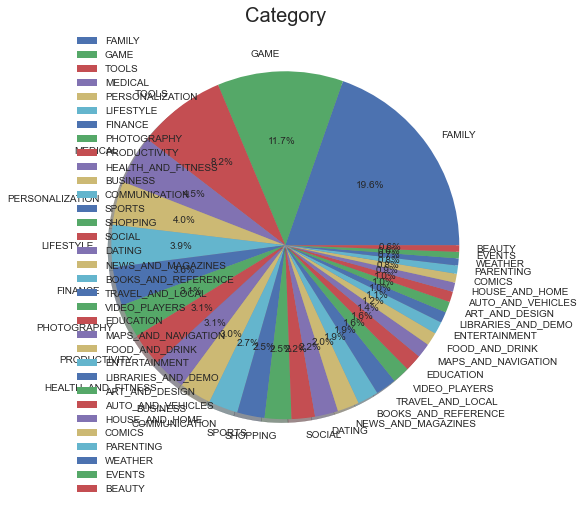

In [47]:
# Category 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(category_count,labels=category_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Category',size = 20)
plt.legend()
plt.show()

In [48]:
con_rating_count = train['Content Rating'].value_counts()
con_rating_count

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

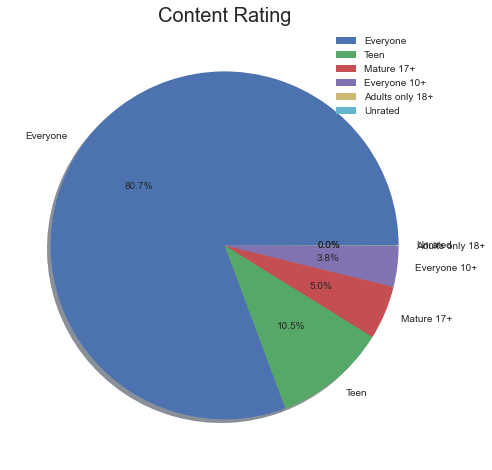

In [49]:
# Content Rating 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(con_rating_count,labels=con_rating_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.legend()
plt.show()

In [50]:
genres_count = train['Genres'].value_counts()
genres_count

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

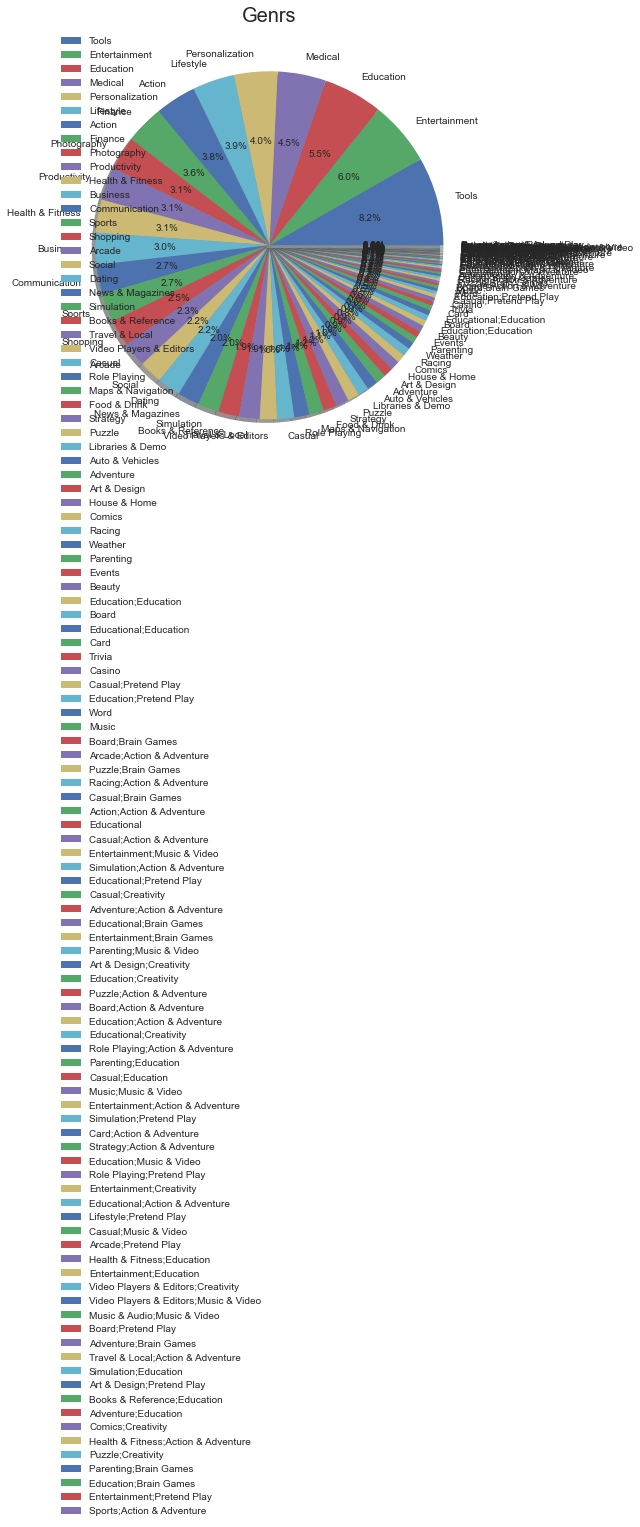

In [51]:
# Genrs 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(genres_count,labels=genres_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Genrs',size = 20)
plt.legend()
plt.show()

## 2. Regression Modeling  

In [8]:
# sklearn 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5590 entries, 0 to 5615
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5590 non-null   float64
 1   Reviews   5590 non-null   int64  
 2   Size      5590 non-null   float64
 3   Installs  5590 non-null   float64
 4   Price     5590 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 262.0 KB


In [10]:
# target 분리, data split
y = continuous['Rating']
X = continuous.iloc[:,1:5]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=318)

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


In [11]:
# Update test data
test_ID = test['Id']
test = test[['Reviews','Size','Installs','Price']]

* validation function

In [12]:
n_folds = 5
train = X
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return (rmse)

In [13]:
def rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

### Base models & scores &  튜닝
####  Base model들을 튜닝을 해준후에 stacking에 적용할 예정이다

* Linear Regression

In [14]:
lr = make_pipeline(RobustScaler(), LinearRegression())

In [15]:
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.5507 (0.0310)



* Lasso와 Ridge도 추가하여 Grid search를 진행한다

In [16]:
lasso_params = {'alpha':[0.001, 0.01,0.1, 1, 2, 3, 4, 10, 30,100],'max_iter':[3000]} 
                 #alpha default = 1, max_iter: 최대반복횟수 default =None
ridge_params = {'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000],'max_iter':[3000]}

models = {'Lasso': GridSearchCV(Lasso(), #L1벌점회귀, 회귀계수의 절대값의 합을 최소화하는 것
                               param_grid=lasso_params,cv = 10).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(Ridge(), #L2벌점회귀 ,회귀계수의 제곱합을 최소화하는 것 
                               param_grid=ridge_params,cv = 10).fit(X_train, y_train).best_estimator_,}

#Ridge : 가중치 계수를 한꺼번에 축소, Lasso : 일부 가중치 계수가 먼저 0으로 수렴.
#Lasso와 Ridge의 제약조건을 동시에 가지는 ElasticNet()모형도 존재한다고 한다.

In [17]:
models

{'Lasso': Lasso(alpha=0.001, max_iter=3000),
 'Ridge': Ridge(alpha=1000, max_iter=3000)}

In [18]:
lr_lasso = lr = make_pipeline(RobustScaler(),Lasso(alpha=0.001,max_iter=3000))

In [19]:
score = rmse_cv(lr_lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5507 (0.0311)



In [20]:
lr_ridge = make_pipeline(RobustScaler(),Ridge(alpha=1000,max_iter=3000))

In [21]:
score = rmse_cv(lr_ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.5508 (0.0313)



* Linear에 비해서 Lasso와 Ridge가 뛰어는 성능을 보이고있진 않은것같다..

* DecisionTreeRegressor  
https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [22]:
dt = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=10))

In [23]:
score = rmse_cv(dt)
print("\nDecision tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision tree score: 0.6051 (0.0423)



In [24]:
#dt에 대한 grid search
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
param_grid = {
    'max_depth': [3,4,5,6], #트리의 최대깊이, default = 없음
    'min_samples_leaf': min_samples_leafs #리프 노드에 필요한 최소 샘플 수, default = 1
}
    
dt_gs = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=10, n_jobs=-1,verbose=2)
        #verbose : 자세한 정도를 제어, 높을수록 더 많은 메시지가 표시
dt_gs.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:   17.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])},
             verbose=2)

In [25]:
print("Best Parameter: {}".format(dt_gs.best_params_))

Best Parameter: {'max_depth': 4, 'min_samples_leaf': 0.1}


In [26]:
dt2 = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=4,min_samples_leaf= 0.1))

In [27]:
#dt : 0.6010 --> dt2:0.5387 좋아졌다!
score = rmse_cv(dt2)
print("\nDecision tree2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision tree2 score: 0.5387 (0.0306)



* KNN


In [28]:
knn = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 3))

In [29]:
score = rmse_cv(knn)     
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 0.6130 (0.0218)



In [30]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]} # 이웃의 수, default =5

gs= GridSearchCV(KNeighborsRegressor(), 
                      param_grid=param_grid, 
                      cv=10,
                      verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, verbose=1)

In [31]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'n_neighbors': 9}


In [32]:
knn2 = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 9))

In [33]:
#KNN score: 0.6130 (0.0218) --> KNN2 score: 0.5591 (0.0308) 좋아졌다!
score = rmse_cv(knn2)     
print("\nKNN2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN2 score: 0.5591 (0.0308)



* SVM (Support Vector Machine)  

In [34]:
svm = make_pipeline(RobustScaler(),SVR())

In [35]:
score = rmse_cv(svm)     
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM score: 0.5488 (0.0335)



* Random Forest

결정트리 모델이 모여서 숲을 이루는 방식

배깅보다 무작위성을 강조

In [36]:
rf = make_pipeline(RandomForestRegressor())

In [37]:
score = rmse_cv(rf)     
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.5659 (0.0329)



In [38]:
#grid search 진행!
param_grid = {
    'n_estimators': [100, 150, 200, 250], #숲의 나무수, default = 100
    'max_depth': [None, 6, 9, 12], #나무의 최대깊이, default = 없음
    'min_samples_split': [2,3,5,10], #내부 노드를 분할하는 데 필요한 최소 샘플 수, default = 2
    'max_features': ['auto', 'sqrt'], #최상의 분할을 검색할 때 고려해야 할 기능 수,default = auto
}
gs = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=10, 
                           n_jobs=-1, #모든코어 다사용
                           verbose=2 
                          )


gs.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed: 22.3min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [39]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 250}


In [40]:
rf2 = make_pipeline(RandomForestRegressor(max_depth= 6, max_features= 'auto', min_samples_split= 3, n_estimators= 250))

In [41]:
#원래 rf : 0.5653 -> rf2 : 0.5282로 좋아졌다!
score = rmse_cv(rf2)     
print("\nRandom Forest2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest2 score: 0.5282 (0.0338)



* GBM  
Boosting 모델로 배운 Gradient boosting 입니다!
* 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 방법
* 회귀, 분류 모두사용가능
* 트리를 깊게 사용하지 않기때문에 메모리사용량이 적고 예측이 빠르다

In [42]:
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.05,
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,
                                              loss = 'huber', random_state=1004))

In [43]:
score = rmse_cv(gbm)     
print("\nGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBM score: 0.5633 (0.0288)



In [228]:
param_grid={'n_estimators':[1000,3000,5000,7000], #수행할 부스팅단계의 수, default = 100
            'learning_rate': [0.02,0.01,0.05,0.1], #학습속도, default = 0.1
            'max_depth':[4,6,8], #개별회귀 추정귀의 최대깊이, default = 4
            'min_samples_leaf':[3,5,9,15,17]} # 리프 노드에 있어야하는 최소 샘플 수,default = 1

gs = GridSearchCV(GradientBoostingRegressor(max_features='sqrt',min_samples_split=10,
                                              loss = 'huber', random_state=1004), param_grid=param_grid, cv=5,n_jobs=-1,verbose=2 )

gs.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 177.9min


KeyboardInterrupt: 

In [ ]:
print("Best Parameter: {}".format(gs.best_params_))

* GBM의 최적변수를 찾기위해 Grid search를 하였는데 너무오래걸려서 결국 실패,,(전부다 cv= 5로하다가 cv=10으로바꾸니까 굉장히 오래걸렸다..)

* XGBoost
* GMB모델 기반으로 부스팅의 발전모델
* Tree를 만들 때 병렬처리가 가능하여 GBM의 속도를 개선해준다

In [54]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [55]:
score = rmse_cv(xgb_model)     
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[20:15:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:16:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:16:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

* LightGBM
* 트리가 한쪽으로만 성장하는 모형
* 균형을 맞추지 않고 한쪽으로만 성장하다보니 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성
* XGBoost보다 메모리 사용량과 학습에 걸리는 시간이 훨씬 효율적 
* 데이터 수가 적으면 과적합이 발생하기 쉬움

In [50]:
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20) 

In [51]:
score = rmse_cv(lgb_model)     
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM score: 0.5302 (0.0301)



In [285]:
#n_estimators를 바꿔서 lgb2를 만들었다. 
lgb2 = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=30)

In [286]:
#LGBM score: 0.5302 (0.0301) --> LGBM2 score: 0.5298 (0.0298) 좋아졌다!
score = rmse_cv(lgb2)
print("\nLGBM2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM2 score: 0.5298 (0.0298)



# 3. Stacking models   

- 두 개 이상의 다른 모델들을 조합해서 최고의 성능을 내는 모델을 만드는것
- Stacking ensemble할때 개별모델을 여러개 사용하여 최종모델 한가지를 만들어내는것

* 단순히 평균 합산을 이용하는 'Averaged base models class'말고 Less simple Stacking : Adding a Meta-model을 사용하여 stcking 할것이다.

### stacking 방법 1 : Less simple Stacking : Adding a Meta-model  
단순 평균 합산이 아닌 meta model 을 학습시켜주는 stacking 방법입니다!  
다른 방법을 쓰시거나 직접 구현하셔도 되고 아래의 코드를 쓰셔도 됩니다  
사이킷런 라이브러리로는 vecstack 이 있고, keras 를 이용한 방법도 구글링하면 많이 나옵니다!

* KFold 기반 Stacking

In [64]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
    kfold = KFold(n_splits = n_folds, random_state = 1004)
  
  # 최종 모델에서 사용할 데이터 셋 세팅 (0 값으로)
  # 만약 shape가 (100,10)이었으면 폴드의 검증 과정 중 저장할 데이터는 (100,1)으로 한다.
    train_fold_predict = np.zeros((X_train.shape[0],1))
  # test 는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold갯수) 모양이다.
  # 해당 폴드마다 X_test의 예측 값을 fold 에 넣는다! meta model 이 쓸꺼임
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model : ',model.__class__.__name__)
  
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_ = X_train.iloc[train_index]
        y_train_ = y_train.iloc[train_index]
        X_valid = X_train.iloc[valid_index]

        # 학습
        model.fit(X_train_,y_train_)
        # 해당 폴드에서 학습된 모델에다가 검증 데이터 (X_valid)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_valid).reshape(-1,1)
        # 해당 폴드에서 생성된 모델에게 원본 테스트 데이터 (X_test)를 이용해서 예측하고 저장
        test_predict[:,cnt] = model.predict(X_test)
  
  # for 문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
    return train_fold_predict, test_predict_mean

In [74]:
# 앙상블 수행 dt2, lr_ridge, lgb2 ->  rf2
dt2_train, dt2_test = get_stacking_data(dt2, X_train, y_train, X_test)
lr_ridge_train, lr_ridge_test = get_stacking_data(lr_ridge, X_train, y_train, X_test)
lgb2_train, lgb2_test = get_stacking_data(lgb2, X_train, y_train, X_test)

model :  Pipeline
model :  Pipeline
model :  LGBMRegressor


In [75]:
# return 된 kfold 결과와 X_test 결과를 skacking
new_X_train = np.concatenate((dt2_train,lr_ridge_train,lgb2_train), axis=1)
new_X_test = np.concatenate((dt2_test,lr_ridge_test,lgb2_test), axis=1)

print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3912, 4) (1678, 4)
새로운 :  (3912, 3) (1678, 3)


In [76]:
# 최종 모델 훈련
rf2.fit(new_X_train,y_train)
stack_pred = rf2.predict(new_X_test)

print("\n Final score: {:.4f}".format(rmse(y_test,stack_pred)))


 Final score: 0.4831


* 여러개를 넣고 돌려보았을때 dt2,lr_ridge,lgb2를 개별모델로 하고 rf2를 최종모델로 훈련시킨 stacking이 가장 나은 성능을 보였다... 더이상 좋아지지 않는다...
* 개별로 넣고 돌려보았을때의 rmse값보다는 낮은 값을 보인다.

### stacking 방법 2 :StackingAveragedModels    
meta model을 사용하는 StackingAveragedModels class를 사용하겠습니당

In [83]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [274]:
#svm,lgb2,knn --> lr 
stacked_averaged_models = StackingAveragedModels(base_models = [svm,lgb2,knn],
                                                 meta_model = lr)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.48695458034203787


* svm,lgb2,knn --> lr 캐글에 제출했던 stacked_pred이다
* 최적의 parameter값을 찾은 모델들로 stacking을 하면 결과가 다 잘나올것이라 예상했지만 꼭 그런것은 아니었다. 성능이 낮아질수도, 높아질수도있다.

In [255]:
#캐글 점수 0.58962??????
stacked_averaged_models = StackingAveragedModels(base_models = [gbm,dt,knn],
                                                 meta_model = lr)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.45638899176236397


* rmse가 제일 값이 낮게 나와서 당연히 캐글에 올리면 더 좋은 결과를 낼 수 있을줄 알았는데 아니었다. 
* 그 이유를 생각해보았는데 현재 print되어있는 값은 train에 predict한 값을 뽑은거고 캐글은 test data에 적용하여 얻은 rmse값을 쓰기 때문에 여기서 점수가 낮다고 무조건 캐글에서도 낮게 나온다고 판단할 수 없는것 같다.(train에서는 잘맞지만 test에서는 잘 안맞는것 같다)

### stacking 방법 3 : sklearn.ensemble.StackingRegressor  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [169]:
from sklearn.ensemble import StackingRegressor

* 여기서는 또 새로운 base모델과 final모델을 사용해서 stacking해보았다.

In [225]:
# 파라미터 설정
estimators = [
              ('lr_lasso',lr_lasso),
              ('lgb2',lgb2),
              ('dt2',dt2)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators, #stacking할 base model들
    final_estimator = rf2, #최종모델 
    cv = 10,
    n_jobs=3, #병렬로 실행할 작업 수, -1이면 모든 프로세서 사용
    verbose=3 #자세한 정도를 제어, 높을수록 더 많은 메시지가 표시
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('lr_lasso',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('lasso',
                                                Lasso(alpha=0.001,
                                                      max_iter=3000))])),
                              ('lgb2',
                               LGBMRegressor(learning_rate=0.05,
                                             n_estimators=30,
                                             objective='regression')),
                              ('dt2',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('decisiontreeregressor',
                                                DecisionTreeRegressor(max_depth=4,
                                                                      min_samples_leaf=0.1))]))],
                  final_estimator=Pipeline(

In [226]:
rmse(y_test,reg.predict(X_test))

0.48128825635930056

* StackingRegressor에서는 lr_lasso,lgb2,dt2 --> rf2 이것이 rmse값이 제일작게 나왔다.

### Final Training and Prediction  


* Ensemble prediction

In [277]:
#stacking 방법 2 :StackingAveragedModels에서 나온 stacked_pred 사용
ensemble = stacked_pred

* Submission

In [278]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['Rating'] = ensemble
sub.to_csv('submission.csv',index=False)

In [279]:
sub.head()

,Id,Rating
0,5617,4.068570
1,5618,4.057795
2,5619,4.003282
3,5620,4.124759
4,5621,4.307809


### submission.csv 파일을 제출하시면 됩니다!  
제출은 하루에 5번 까지 가능합니다~!


* 개별모델들로 예측하는거 보다는 튜닝을하고 stacking방법을 적용하는것이 성능이 제일 좋아지는 것 같다.
* stacking하는 모델들을 같게 하여도 어떤 stacking방법을 하냐에 따라서도 성능차이가 보인다. 분석하려는 데이터에맞는 방법을 사용하여야 할 것 같다.